<a href="https://colab.research.google.com/github/hyunicecream/Natural-Language-Processing-NLP-/blob/main/7_8_%EB%AA%A9Group(skipgram)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.stem import LancasterStemmer
from tensorflow.keras.layers import Input, Embedding, Dense
from tensorflow.keras.models import Model
from sklearn.metrics.pairwise import cosine_similarity
nltk.download('punkt')
nltk.download('gutenberg')

text_id = nltk.corpus.gutenberg.fileids()
text_id


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [20]:
# 영문 소설 10개만 사용한다.
n = 10
stemmer = LancasterStemmer()
sent_stem = []
for i, text_id in enumerate(nltk.corpus.gutenberg.fileids()[:n]):
    text = nltk.corpus.gutenberg.raw(text_id)
    sentences = nltk.sent_tokenize(text)

    # 각 단어에 Lancaster stemmer를 적용한다.
    for sentence in sentences:
        word_tok = nltk.word_tokenize(sentence)
        stem = [stemmer.stem(word) for word in word_tok]
        sent_stem.append(stem)
    print('{}: {} ----- processed.'.format(i+1, text_id))

print("총 문장 개수 =", len(sent_stem))
print(sent_stem[0])

1: austen-emma.txt ----- processed.
2: austen-persuasion.txt ----- processed.
3: austen-sense.txt ----- processed.
4: bible-kjv.txt ----- processed.
5: blake-poems.txt ----- processed.
6: bryant-stories.txt ----- processed.
7: burgess-busterbrown.txt ----- processed.
8: carroll-alice.txt ----- processed.
9: chesterton-ball.txt ----- processed.
10: chesterton-brown.txt ----- processed.
총 문장 개수 = 59824
['[', 'emm', 'by', 'jan', 'aust', '1816', ']', 'volum', 'i', 'chapt', 'i', 'emm', 'woodh', ',', 'handsom', ',', 'clev', ',', 'and', 'rich', ',', 'with', 'a', 'comfort', 'hom', 'and', 'happy', 'disposit', ',', 'seem', 'to', 'unit', 'som', 'of', 'the', 'best', 'bless', 'of', 'ex', ';', 'and', 'had', 'liv', 'near', 'twenty-one', 'year', 'in', 'the', 'world', 'with', 'very', 'littl', 'to', 'distress', 'or', 'vex', 'her', '.']


In [22]:
# 토크나이저 하기
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sent_stem)

NameError: ignored

In [29]:
# 사전 만들기
word2idx = tokenizer.word_index
idx2word = {v:k for k, v in word2idx.items()}
print(word2idx)
print(idx2word)
print("사전크기 = ", len(word2idx))

{',': 1, 'the': 2, 'and': 3, 'of': 4, '.': 5, 'to': 6, 'in': 7, 'a': 8, 'that': 9, 'he': 10, 'i': 11, ';': 12, 'it': 13, 'for': 14, 'his': 15, ':': 16, 'was': 17, 'not': 18, 'be': 19, 'is': 20, 'with': 21, 'on': 22, 'shal': 23, 'they': 24, "''": 25, 'her': 26, 'him': 27, 'al': 28, 'you': 29, 'as': 30, 'unto': 31, 'but': 32, 'them': 33, 'hav': 34, 'lord': 35, '``': 36, 'had': 37, 'she': 38, 'said': 39, 'which': 40, 'my': 41, 'me': 42, '?': 43, 'from': 44, 'at': 45, '--': 46, 'their': 47, 'wil': 48, 'thou': 49, 'by': 50, 'wer': 51, 'thi': 52, 'god': 53, "'s": 54, 'ar': 55, 'ye': 56, 'so': 57, 'thy': 58, 'man': 59, 'when': 60, 'ther': 61, 'out': 62, 'an': 63, '!': 64, 'ev': 65, 'say': 66, 'up': 67, 'no': 68, 'son': 69, 'do': 70, 'if': 71, 'then': 72, 'day': 73, 'upon': 74, 'very': 75, 'yo': 76, 'we': 77, 'or': 78, 'com': 79, 'king': 80, 'thing': 81, 'what': 82, 'into': 83, 'cam': 84, 'off': 85, 'hous': 86, 'would': 87, 'could': 88, 'bef': 89, 'israel': 90, 'us': 91, 'peopl': 92, 'mor': 93

In [30]:
# 문장을 단어의 인덱스로 표현
sent_idx = tokenizer.texts_to_sequences(sent_stem)
# sent_idx[0]

np.array(sent_idx[1])


array([  38,   17,    2, 2540,    4,    2,  134,  251,    4,    8,  233,
        570,    1, 1861,   98,   12,    3,   37,    1,    7, 1170,    4,
         26,  305,   54,  374,    1,   96, 2173,    4,   15,   86,   44,
          8,   75,  133, 2047,    5])

In [35]:
# trigram
x_train = []
y_train = []
for sent in sent_idx:
    if len(sent) < 3:
        continue

    for a, b, c in nltk.trigrams(sent):
        x_train.append(b)
        x_train.append(b)
        y_train.append(a)
        y_train.append(c)

x_train
y_train

array([[230],
       [230],
       [ 50],
       ...,
       [ 15],
       [171],
       [171]])

In [32]:
# 배열 맞춰주기
x_train = np.array(x_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)

In [36]:
# 사전이 0부터 시작되기 때문에 +1을 해준다. 
VOC_SIZE = len(word2idx) + 1
EMB_SIZE = 32

x_input = Input(batch_shape=(None, 1))
x_emb = Embedding(VOC_SIZE, EMB_SIZE)(x_input)
y_output = Dense(VOC_SIZE, activation='softmax')(x_emb)
# flatten을 써도되고 안써도 되는데 flatten은 차원을 줄여주는 역할을 한다.
# 그래서 3차원 배열을 2차원으로 줄여준다. 2차원은 1차원으로 줄여준다. 

model = Model(x_input, y_output)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='adam')
model.summary()

# word --> word2vec을 확인하기 위한 모델
model_vec = Model(x_input, x_emb)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 1, 32)             677824    
_________________________________________________________________
dense_1 (Dense)              (None, 1, 21182)          699006    
Total params: 1,376,830
Trainable params: 1,376,830
Non-trainable params: 0
_________________________________________________________________


In [37]:
hist = model.fit(x_train, y_train, batch_size=10240, epochs=10)

Epoch 1/10
304/304 [==============================] - 15s 47ms/step - loss: 8.1881
Epoch 2/10
304/304 [==============================] - 14s 46ms/step - loss: 6.0953
Epoch 3/10
304/304 [==============================] - 14s 46ms/step - loss: 5.8715
Epoch 4/10
304/304 [==============================] - 14s 46ms/step - loss: 5.6991
Epoch 5/10
304/304 [==============================] - 14s 46ms/step - loss: 5.5961
Epoch 6/10
304/304 [==============================] - 14s 46ms/step - loss: 5.5160
Epoch 7/10
304/304 [==============================] - 14s 46ms/step - loss: 5.4505
Epoch 8/10
304/304 [==============================] - 14s 46ms/step - loss: 5.3994
Epoch 9/10
304/304 [==============================] - 14s 46ms/step - loss: 5.3602
Epoch 10/10
304/304 [==============================] - 14s 46ms/step - loss: 5.3297


In [41]:
# 코사인 유사도 father, mother, doctor의 유사도 구해보기
def get_word2vec(word):
    stem_word = stemmer.stem(word)
    if stem_word not in word2idx:
        print('{}가 없습니다.'.format(word))
        return
    
    word2vec = model_vec.predict(np.array(word2idx[stem_word]).reshape(1,1))[0]
    return word2vec

father = get_word2vec('father')
mother = get_word2vec('mother')
doctor = get_word2vec('doctor')

cosine_similarity(father, mother) # array([[0.8552003]], dtype=float32)

cosine_similarity(father, doctor) # array([[0.6684933]], dtype=float32)

cosine_similarity(mother, doctor) # array([[0.7017375]], dtype=float32)

array([[0.8552003]], dtype=float32)

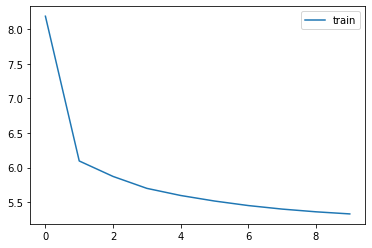

In [42]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], label='train')
plt.legend()
plt.show()